In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 

In [2]:
dataset = pd.read_excel('home_energy.xlsx', parse_dates=['Date'])
dataset_csv = pd.read_csv('home_energy.csv')
dataset.drop('Unnamed: 4', axis = 1)
dataset.head()

,Date,Device,Time,Status,Unnamed: 4
0,2019-12-17,Device 1,02:03:50.400000,ON,NaN
1,NaT,Device 1,05:44:09.600000,ON,NaN
2,NaT,Device 1,07:56:38.400000,ON,NaN
3,NaT,Device 1,08:55:40.800000,OFF,NaN
4,NaT,Device 1,15:15:50.400000,ON,NaN


In [3]:
dataset_csv.head()

,Equipment,Time,Condition,Unnamed: 3
0,Device 1,2:03:50 AM,ON,NaN
1,Device 1,5:44:10 AM,ON,NaN
2,Device 1,7:56:38 AM,ON,NaN
3,Device 1,8:55:41 AM,OFF,NaN
4,Device 1,3:15:50 PM,ON,NaN


In [4]:
type(dataset_csv['Time'])

pandas.core.series.Series

In [5]:

dataset['Time'] = dataset_csv['Time']
dataset = dataset[["Date", "Time", "Device", "Status"]]
dataset.head()

,Date,Time,Device,Status
0,2019-12-17,2:03:50 AM,Device 1,ON
1,NaT,5:44:10 AM,Device 1,ON
2,NaT,7:56:38 AM,Device 1,ON
3,NaT,8:55:41 AM,Device 1,OFF
4,NaT,3:15:50 PM,Device 1,ON


In [6]:
dataset = dataset.fillna(method="pad")
dataset.head()

,Date,Time,Device,Status
0,2019-12-17,2:03:50 AM,Device 1,ON
1,2019-12-17,5:44:10 AM,Device 1,ON
2,2019-12-17,7:56:38 AM,Device 1,ON
3,2019-12-17,8:55:41 AM,Device 1,OFF
4,2019-12-17,3:15:50 PM,Device 1,ON


In [7]:
placeholder = dataset.iloc[100:400]

In [8]:
data_keep = pd.date_range('2020-03-03', periods = 100, freq="D")
data_keep = placeholder["Date"]

In [9]:
placeholder.to_csv("Placeholder.csv")

In [10]:
dataset["Time"] = pd.to_datetime(dataset['Time'])

In [11]:
dataset.head()

,Date,Time,Device,Status
0,2019-12-17,2020-03-09 02:03:50,Device 1,ON
1,2019-12-17,2020-03-09 05:44:10,Device 1,ON
2,2019-12-17,2020-03-09 07:56:38,Device 1,ON
3,2019-12-17,2020-03-09 08:55:41,Device 1,OFF
4,2019-12-17,2020-03-09 15:15:50,Device 1,ON


In [12]:
dataset = dataset.fillna(method="pad")
dataset.head()

,Date,Time,Device,Status
0,2019-12-17,2020-03-09 02:03:50,Device 1,ON
1,2019-12-17,2020-03-09 05:44:10,Device 1,ON
2,2019-12-17,2020-03-09 07:56:38,Device 1,ON
3,2019-12-17,2020-03-09 08:55:41,Device 1,OFF
4,2019-12-17,2020-03-09 15:15:50,Device 1,ON


In [13]:
#now beginnning to generate all that much data
data = pd.date_range(start = "2020-03-09", end = "2020-05-09", freq="H")
len(data)

1465

In [14]:
data

DatetimeIndex(['2020-03-09 00:00:00', '2020-03-09 01:00:00',
               '2020-03-09 02:00:00', '2020-03-09 03:00:00',
               '2020-03-09 04:00:00', '2020-03-09 05:00:00',
               '2020-03-09 06:00:00', '2020-03-09 07:00:00',
               '2020-03-09 08:00:00', '2020-03-09 09:00:00',
               ...
               '2020-05-08 15:00:00', '2020-05-08 16:00:00',
               '2020-05-08 17:00:00', '2020-05-08 18:00:00',
               '2020-05-08 19:00:00', '2020-05-08 20:00:00',
               '2020-05-08 21:00:00', '2020-05-08 22:00:00',
               '2020-05-08 23:00:00', '2020-05-09 00:00:00'],
              dtype='datetime64[ns]', length=1465, freq='H')

In [15]:
the_devices_1 = ["Device 1"] * 367
the_devices_2 = ["Device 2"] * 366
the_devices_3 = ["Device 3"] * 366
the_devices_4 = ["Device 4" ] * 366
the_devices = [*the_devices_1, *the_devices_2, *the_devices_3, *the_devices_4]
the_devices = np.array(the_devices)

In [16]:
len(the_devices), the_devices[-100], the_devices.shape, type(the_devices)

(1465, 'Device 4', (1465,), numpy.ndarray)

In [17]:
#now shuffle devices array to get a feel
np.random.shuffle(the_devices)

In [18]:
the_devices[:20]

array(['Device 3', 'Device 4', 'Device 1', 'Device 3', 'Device 3',
       'Device 3', 'Device 1', 'Device 1', 'Device 1', 'Device 1',
       'Device 4', 'Device 3', 'Device 1', 'Device 3', 'Device 4',
       'Device 4', 'Device 2', 'Device 1', 'Device 4', 'Device 2'],
      dtype='<U8')

In [19]:
dataset = pd.DataFrame({"Date": data, "Equipment":the_devices})
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset.head()

,Date,Equipment
0,2020-03-09 00:00:00,Device 3
1,2020-03-09 01:00:00,Device 4
2,2020-03-09 02:00:00,Device 1
3,2020-03-09 03:00:00,Device 3
4,2020-03-09 04:00:00,Device 3


In [20]:
time_serie = pd.Series(dataset['Equipment'].values, index= dataset['Date'])
dataset["Hour"] = time_serie.index.hour
dataset["Minute"] = time_serie.index.minute
dataset["Seconds"] = time_serie.index.second
dataset.head()

,Date,Equipment,Hour,Minute,Seconds
0,2020-03-09 00:00:00,Device 3,0,0,0
1,2020-03-09 01:00:00,Device 4,1,0,0
2,2020-03-09 02:00:00,Device 1,2,0,0
3,2020-03-09 03:00:00,Device 3,3,0,0
4,2020-03-09 04:00:00,Device 3,4,0,0


In [21]:
dataset_test = dataset.copy()
dataset_test = dataset_test.drop("Date", axis = 1)
dataset_test = dataset_test[["Hour", "Minute", "Seconds", "Equipment"]]
dataset_test = pd.get_dummies(dataset_test, columns=["Equipment"], prefix="Equipment")
dataset_test.head()

,Hour,Minute,Seconds,Equipment_Device 1,Equipment_Device 2,Equipment_Device 3,Equipment_Device 4
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,2,0,0,1,0,0,0
3,3,0,0,0,0,1,0
4,4,0,0,0,0,1,0


In [22]:
#now to predict the results
estimator = pickle.load(open("random_forest_model.pkl", "rb"))
predicted_values  = estimator.predict(dataset_test.values)

In [23]:
predicted = []
for i in predicted_values:
    if i == 0:
        predicted.append("ON")
    else:
        predicted.append("OFF")
predicted

['ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 '

In [ ]:
dataset["Condition"] = predicted
dataset = dataset.drop(["Hour", "Minute", "Seconds"], axis = 1)
dataset

In [42]:
dataset.to_csv("Predicted_values.csv")

In [43]:
dataset.head()

,Date,Equipment,Condition
0,2020-03-09 00:00:00,Device 4,ON
1,2020-03-09 01:00:00,Device 2,ON
2,2020-03-09 02:00:00,Device 4,ON
3,2020-03-09 03:00:00,Device 2,ON
4,2020-03-09 04:00:00,Device 2,ON


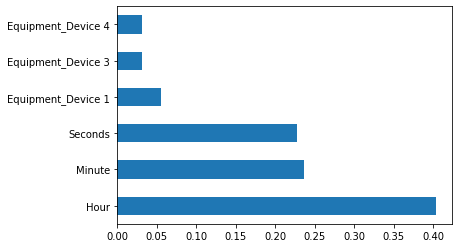

In [24]:
#let us try to visualize the most important features
feat_importances = pd.Series(estimator.feature_importances_, index=dataset_test.columns)
feat_importances.nlargest(6).plot(kind='barh')